In [103]:
import numpy as np
import pandas as pd
import math

In [104]:
N = 1200  
Train = []   
for r in range(1,N):      
     a = np.loadtxt(f"{r}.dssp", dtype=str)
     Train.append(a)
#print(Train)

In [105]:
list_of_AA_seq = []
list_of_prot_secstruc = []
for a in Train:
    list_of_AA_seq.append(a[1]) 
    list_of_prot_secstruc.append(a[0]) 

In [106]:
#print(list_of_AA_seq)

In [107]:
#print(list_of_prot_secstruc)

In [152]:
def get_residue_structure(num):
    List =  [] 
    for x in range(len(num)): 
        seq = num[x] 
        for aa in range(len(seq)):
            List.append(seq[aa])
        
    return List 

In [153]:
all_residues_in_train = get_residue_structure(list_of_AA_seq)
all_secstruc_in_train = get_residue_structure(list_of_prot_secstruc) 

In [154]:
#print(all_residues_in_train)

In [155]:
#print(all_secstruc_in_train)

In [156]:
def get_secstruc_conform_list(residuelist, struc_type,secstruclist):   
    struc = []
    struc_pos = []
    for i in range(0, len(residuelist)):          
        if secstruclist[i] == struc_type:
            struc.append(residuelist[i])
            struc_pos.append(i)
    return struc, struc_pos

In [157]:
allaminoacid_in_alphaconform = get_secstruc_conform_list(all_residues_in_train, 'H',all_secstruc_in_train)[0]
alphaconform_pos = get_secstruc_conform_list(all_residues_in_train, 'H',all_secstruc_in_train)[1]

In [158]:
#print(allaminoacid_in_alphaconform)

In [159]:
#print(alphaconform_pos)

In [160]:
allaminoacid_in_extendconform = get_secstruc_conform_list(all_residues_in_train, 'E',all_secstruc_in_train)[0]
extendconform_pos = get_secstruc_conform_list(all_residues_in_train, 'E',all_secstruc_in_train)[1]

In [161]:
#print(allaminoacid_in_extendconform)

In [162]:
#print(extendconform_pos)

In [163]:
allaminoacid_in_otherconform = get_secstruc_conform_list(all_residues_in_train, '-',all_secstruc_in_train)[0]
otherconform_pos = get_secstruc_conform_list(all_residues_in_train, '-',all_secstruc_in_train)[1]

In [164]:
#print(allaminoacid_in_otherconform)

In [121]:
#print(otherconform_pos)

In [165]:
def matrix(rows, columns):
    n = len(rows)
    t = len(columns) 
    m=[]
    for i in range(n):
        m.append([])
        for j in range(t):
            m[i].append(0)
    assert len(m) == n
    assert len(m[0]) == t
    return m

In [166]:
j_range = [-8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
AA_list = ['A', 'R','N','D','C','E','Q','G','H','I','L','K','M','F','P', 'S', 'T', 'W','Y', 'V']

In [167]:
alpha_score_matrix = matrix(AA_list, j_range)
extend_score_matrix = matrix(AA_list, j_range)
other_score_matrix = matrix(AA_list, j_range)
#print(str(alpha_score_matrix) + ('\n') + str(extend_score_matrix) + ('\n') + str(other_score_matrix))

function calculate_propensity() implements equations 1 and 2 to calculate score
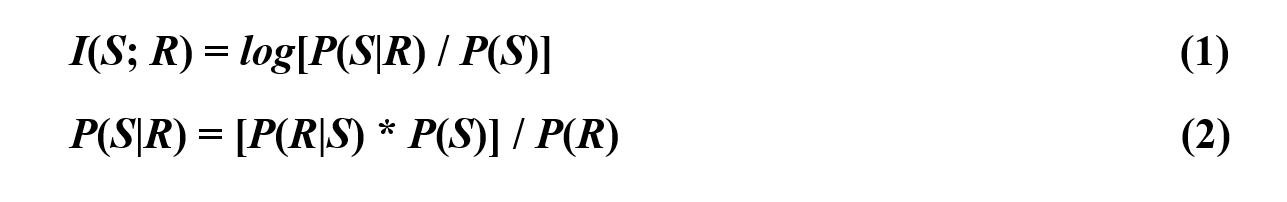

In [177]:
def calculate_propensity(count_AA_SS, residuelist, count_AA, struc, freq):
    prob_struc = count_AA_SS/len(residuelist)
    prob_AA = count_AA/len(residuelist) 
    prob_AA_j_pos = freq /len(struc)
    prob_aminoacid = (prob_AA_j_pos * prob_struc) / (prob_AA)
    prob_aminoacid = prob_aminoacid / prob_struc
    score = math.log(prob_aminoacid)
    return score

In [169]:
def get_AA_prob(AA_list, j_range, strucpos, struc, residuelist):

    count_AA = 0
    for i in range(0, len(residuelist)):
        if residuelist[i] == AA_list :
            count_AA += 1

    count_AA_SS = 0
    for i in range(0, len(struc)):
        if struc[i] == AA_list :
            count_AA_SS += 1
            
    if strucpos == otherconform_pos:
        m = len(strucpos) - 8
        strucpos = strucpos[8:m] 

    if j_range == 0:
        pos_h = []
        for i in range(0, len(strucpos)):
            index = strucpos[i]
            if residuelist[index] == AA_list:   
                pos_h.append(residuelist[index])
                freq = len(pos_h) 
                
    if  9 > j_range > 0:
        freq_AA_j_pos = []
        for i in range(0, len(strucpos)):
            index = strucpos[i] + j_range 
            if residuelist[index] == AA_list:
                freq_AA_j_pos.append(residuelist[index])
                freq = len(freq_AA_j_pos)
       
    if  0 > j_range > -9:
        freq_AA_j_pos = []
        for i in range(0, len(strucpos)):
            index = strucpos[i] + j_range 
            if residuelist[index] == AA_list:
                freq_AA_j_pos.append(residuelist[index])
                freq = len(freq_AA_j_pos)
                
    score = calculate_propensity(count_AA_SS, residuelist, count_AA, struc, freq)
    return score

In [170]:
for i in range(0, len(AA_list)):
    for j in range(0,len(j_range)):
        alpha_score_matrix[i][j] = get_AA_prob(AA_list[i], j_range[j], alphaconform_pos ,allaminoacid_in_alphaconform, all_residues_in_train)
        extend_score_matrix[i][j] = get_AA_prob(AA_list[i], j_range[j], extendconform_pos, allaminoacid_in_extendconform, all_residues_in_train)
        other_score_matrix[i][j] = get_AA_prob(AA_list[i], j_range[j], otherconform_pos, allaminoacid_in_otherconform, all_residues_in_train)
alpha_df = pd.DataFrame(alpha_score_matrix)
alpha_df.index = AA_list
extend_df = pd.DataFrame(extend_score_matrix)
extend_df.index = AA_list
other_df = pd.DataFrame(other_score_matrix)
other_df.index = AA_list
#print('extend matrix: \n' + str(extend_df) +'\n')
#print('alpha matrix: \n' + str(alpha_df) + '\n')
#print('other matrix: \n' + str(other_df))


In [171]:
test_protein_seq = "1011.dssp"

file = np.loadtxt(test_protein_seq, dtype=str)
AA_seq = file[1]
SS_actual = file[0]

In [172]:
def get_row(AA_target, row):
    for i in range(0, len(row)):
        if AA_target == row[i]:
            return i

In [173]:
def get_structure_score(seq, matrix_type, AAlist):
    final_score = []
    add_score = []

    for pos in range(0, len(seq)):
        
        target_pos = pos
        target_AA = seq[target_pos]
        row = get_row(target_AA, AAlist)
        j_zero = 8
        score = matrix_type[row][j_zero]
        add_score.append(score)

        if pos < 8: 
            for x in range(1,9):
                new_target_pos = target_pos + x
                new_target_AA = seq[new_target_pos]
                new_row = get_row(new_target_AA, AAlist)
                j_Cterm = j_zero + x
                score = matrix_type[new_row][j_Cterm]
                add_score.append(score)

        if (len(seq) - 8) > pos > 7:
            for x in range(1,9):
                new_target_pos = target_pos + x
                new_target_AA = seq[new_target_pos]
                new_row = get_row(new_target_AA, AAlist)
                j_Cterm = j_zero + x
                score = matrix_type[new_row][j_Cterm]
                add_score.append(score)
                new_target_pos = target_pos - x
                new_target_AA = seq[new_target_pos]
                new_row = get_row(new_target_AA, AAlist)
                j_Nterm = j_zero - x
                score = matrix_type[new_row][j_Nterm]
                add_score.append(score)       

        if pos >= (len(seq) - 8):
            for x in range(1,9):
                new_target_pos = target_pos - x
                new_target_AA = seq[new_target_pos]
                new_row = get_row(new_target_AA, AAlist)
                j_Nterm = j_zero - x
                score = matrix_type[new_row][j_Nterm]
                add_score.append(score)
                
        add = sum(add_score)
        final_score.append(add)
        add_score = []

    return final_score

In [174]:
res_AA = get_residue_structure(AA_seq)
struc_actual = get_residue_structure(SS_actual)

alpha_score = get_structure_score(res_AA, alpha_score_matrix, AA_list)
extend_score = get_structure_score(res_AA, extend_score_matrix, AA_list)
other_score = get_structure_score(res_AA, other_score_matrix, AA_list)

print('pH: \n' + str(alpha_score) + ('\n') +'pE: \n'+ str(extend_score) + ('\n') +'pO: \n'+ str(other_score))

pH: 
[-0.3960509366844146, -0.8457479590010081, -1.460221381805302, -1.0843517243728507, -0.5736790534446692, -1.206842277392292, -1.6312175512340752, -1.273737785386656, -0.4232848814923943, -0.21367626855333688, -0.3020241896551839, -0.3344836907855765, -0.597242731031089, -0.9008849891372521, -0.6914088981059265, -0.7998718030556868, -0.7856539133115763, -0.8061108104273094, -1.0710251285636732, -1.1371713659768274, -0.8454217145654676, -0.6456062934378032, -0.5863606261131044, -0.608895880858132, -0.6718649635415205, -0.8992477077773021, -0.9004097833114844, -1.118962069957428, -1.496773916674292, -1.7461806354528573, -2.231738718938274, -1.568203265405914, -1.5850014833492114, -1.3838101496951343, -1.2969640264091697, -0.9865307391744685, -0.8906824002198371, -0.844139037233167, -1.1145356728936529, -1.592374948623835, -2.174985242182632, -2.5124471816239655, -1.5900329496732317, -1.2712565241251903, -1.0550804123738273, -1.1253267831907616, -1.5377194952695379, -1.506313079330480

In [175]:
predicted_structure = []
for i in range(0, len(struc_actual)):
    if other_score[i] > extend_score[i] and other_score[i] > alpha_score[i]:
        secondary_struc = '-'
        predicted_structure.append(secondary_struc)
      
    if extend_score[i] > other_score[i] and extend_score[i] > alpha_score[i]:
        secondary_struc = 'E'
        predicted_structure.append(secondary_struc)
      
    if alpha_score[i]> extend_score[i] and alpha_score[i]>other_score[i]:
        secondary_struc = 'H'
        predicted_structure.append(secondary_struc)
print('Predicted: \n' + str(predicted_structure))
print('Actual: \n' + str(struc_actual))

Predicted: 
['-', '-', '-', '-', 'E', 'E', '-', '-', '-', 'E', 'E', 'E', 'E', 'E', '-', '-', '-', '-', 'E', '-', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '-', '-', '-', '-', 'E', 'E', 'E', 'E', '-', '-', '-', '-', '-', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '-', 'E', 'E', 'E', 'E', 'E', 'E', '-', '-', '-', 'E', 'E', 'E', 'E', 'E', '-', '-', '-', '-', 'E', 'E', 'E', 'E', 'E', 'E', '-', '-', '-', '-', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '-', '-', '-', '-', 'E', 'E', '-', '-', '-', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '-', '-', '-', '-', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '-', '-', 'E', '-', '-', '-', '-', '-', 'E', 'E', '-', '-', '-', 'E', 'E', 'E', 'E', 'H', 'H', 'H', 'H', 'H', '-', '-', '-', '-', '-', '-', 'H', 'H', '-', 'H', 'H', 'E', 'E', 'H', 'H', 'H', 'H', 'E']
Actual: 
['-', '-', '-', '-', 'E', 'E', '-', '-', '-', '-', 'E', 'E', '-', '-', '-', '-', 'E', 'E', 'E', 'E', '-', 'E', 'E', 'E', '-', '-', '-', '-', 'E', 'E

In [176]:
prediction = []
actual_ss = []
ind = 0  
for i in range(0, len(predicted_structure)):
    if struc_actual[i] == predicted_structure[i]:
        ind += 1
prediction.append(ind)
actual_ss.append(len(struc_actual))
   
print ('predicted seq: ' + str(prediction) +'\n'+ 'total seq: ' + str(actual_ss))

print('accuracy: ' + str((sum(prediction))/(sum(actual_ss))))

predicted seq: [114]
total seq: [166]
accuracy: 0.6867469879518072
